# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [6]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [64]:
df = data[['race', 'call']]
w = df[df.race=='w']
b = df[df.race=='b']

In [65]:
df.info()
#df.call = df.call.astype(np.int32)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
race    4870 non-null object
call    4870 non-null float32
dtypes: float32(1), object(1)
memory usage: 255.1+ KB


In [63]:
# number of callbacks for black-sounding names
print(sum(df[df.race=='b'].call), 'total callbacks for black-sounding names')

# number of callbacks for white-sounding names
print(sum(df[df.race=='w'].call), 'total callbacks for white-sounding names')

157.0 total callbacks for black-sounding names
235.0 total callbacks for white-sounding names


## 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
## 4. Write a story describing the statistical significance in the context or the original problem.
## 5. Does your analysis mean that race/name is the most important factor in callback success? 
* Why or why not? 
    * If not, how would you amend your analysis?

## 1. What test is appropriate for this problem?
* Does CLT apply

In [56]:
black_mean = np.mean(b.call)
white_mean = np.mean(w.call)
print('The mean call back rate for white sounding names is: ', white_mean)
print('The mean call back rate for black sounding names is: ', black_mean)
mean_diff = white_mean - black_mean
print('The difference between the two mean call back rates is: ', mean_diff)

The mean call back rate for white sounding names is:  0.09650924056768417
The mean call back rate for black sounding names is:  0.0644763857126236
The difference between the two mean call back rates is:  0.03203285485506058


In [43]:
# This function will allow us to take our data and increase the number of our observations.

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))

    return bs_replicates

The standard error of the mean of the original white call data is: 0.0059840016981803105
The standard error of the mean of our white bootstrapped data is: 0.005968111356413899

The standard error of the mean of the original black call data is: 0.0059840016981803105
The standard error of the mean of our black bootstrapped data is: 0.004960308992604775


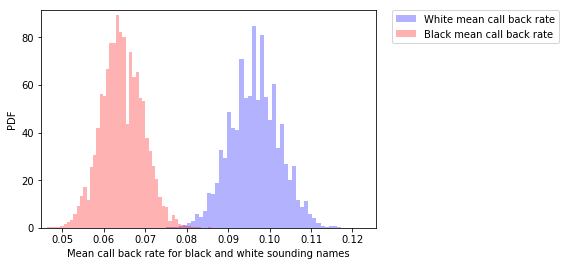

There is a 95% chance a data point would fall between [0.08501027 0.10841889]
The difference between the 2.5%, 50%, 97.5% percentiles are:  [0.01144957] [0.01195905]
There is a 95% chance a data point would fall between [0.0550308  0.07433265]
The difference between the 2.5%, 50%, 97.5% percentiles are:  [0.00941047] [0.00989137]

This shows that we have symmetry, normal distribution


In [58]:
# Take 100,000 bootstrap replicates of the mean: bs_replicates
w_replicates = draw_bs_reps(w.call, np.mean, 10000)
b_replicates = draw_bs_reps(b.call, np.mean, 10000)

# Compute the standard error of mean
w_sem = np.std(w.call) / np.sqrt(len(w.call))
b_sem = np.std(b.call) / np.sqrt(len(b.call))

# Compute standard deviation of bootstrap replicates
w_std = np.std(w_replicates)
b_std = np.std(b_replicates)

print('The standard error of the mean of the original white call data is: ' + str(sem))
print('The standard error of the mean of our white bootstrapped data is: ' + str(w_std))
print('\nThe standard error of the mean of the original black call data is: ' + str(sem))
print('The standard error of the mean of our black bootstrapped data is: ' + str(b_std))

# Make a histogram of the results
_ = plt.hist(w_replicates, bins=50, normed=True, alpha=.3, label = 'White mean call back rate', color='blue')
_ = plt.hist(b_replicates, bins=50, normed=True, alpha=.3, label = 'Black mean call back rate', color='red')
plt.xlabel('Mean call back rate for black and white sounding names')
plt.ylabel('PDF')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

print('There is a 95% chance a data point would fall between', np.percentile(w_replicates, [2.5, 97.5]))
print('The difference between the 2.5%, 50%, 97.5% percentiles are: ',\
     np.mean(w_replicates) - np.percentile(w_replicates, [2.5]),\
     np.percentile(w_replicates, [97.5]) - np.mean(w_replicates))
print('There is a 95% chance a data point would fall between', np.percentile(b_replicates, [2.5, 97.5]))
print('The difference between the 2.5%, 50%, 97.5% percentiles are: ',\
     np.mean(b_replicates) - np.percentile(b_replicates, [2.5]),\
     np.percentile(b_replicates, [97.5]) - np.mean(b_replicates))

print('\nThis shows that we have symmetry, normal distribution')

**CLT _(does not)_ applies to this because of _(reason)_**

## 2. What are the null and alternate hypothesis?

$H_0$: That black sounding names ($\mu$) recieve the same percentage of call backs as white sounding names ($\mu_0$), $\mu$ = $\mu_0$. $\alpha$ = 0.05

$H_A$: Race association affects call back rates, and they are not the same. $\mu\neq\mu_0$.

_Is mean the best use of comparison?_

### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [23]:
print(w)

     race  call
0       w   0.0
1       w   0.0
4       w   0.0
5       w   0.0
6       w   0.0
11      w   0.0
13      w   0.0
15      w   0.0
16      w   0.0
18      w   0.0
21      w   0.0
22      w   0.0
23      w   0.0
24      w   0.0
27      w   0.0
30      w   0.0
32      w   0.0
34      w   0.0
35      w   0.0
39      w   0.0
40      w   0.0
42      w   0.0
43      w   0.0
46      w   0.0
48      w   0.0
51      w   0.0
52      w   0.0
54      w   0.0
56      w   0.0
58      w   0.0
...   ...   ...
4811    w   0.0
4813    w   0.0
4814    w   0.0
4816    w   0.0
4817    w   0.0
4819    w   0.0
4822    w   0.0
4824    w   0.0
4826    w   1.0
4829    w   1.0
4830    w   0.0
4831    w   0.0
4834    w   0.0
4836    w   0.0
4838    w   0.0
4839    w   0.0
4843    w   1.0
4845    w   0.0
4846    w   1.0
4847    w   1.0
4851    w   0.0
4852    w   0.0
4854    w   0.0
4855    w   0.0
4860    w   0.0
4861    w   1.0
4862    w   0.0
4863    w   0.0
4867    w   0.0
4869    w   0.0

[2435 r

In [22]:
print(w.count(0))

race    2435
call    2435
dtype: int64


In [26]:
print(type(w.call[0]))

<class 'numpy.float32'>


In [20]:
print(np.mean(w.call)*100)
print(np.mean(b.call)*100)

9.650924056768417
6.44763857126236


In [40]:
 w = data[data.race=='w']
b = data[data.race=='b']

n_w = len(w)
n_b = len(b)

prop_w = np.sum(w.call) / len(w)
prop_b = np.sum(b.call) / len(b)

prop_diff = prop_w - prop_b
phat = (np.sum(w.call) + np.sum(b.call)) / (len(w) + len(b))

z = prop_diff / np.sqrt(phat * (1 - phat) * ((1 / n_w) + (1 / n_b)))
pval = stats.norm.cdf(-z) * 2
print("Z score: {}".format(z))
print("P-value: {}".format(pval))

moe = 1.96 * np.sqrt(phat * (1 - phat) * ((1 / n_w) + (1 / n_b)))
ci = prop_diff + np.array([-1, 1]) * moe
print("Margin of Error: {}".format(moe))
print("Confidence interval: {}".format(ci)) 

#From https://dscareercommunity.springboard.com/t/80k54y/eda-mini-projects

Z score: 4.108412152434346
P-value: 3.983886837585077e-05
Margin of Error: 0.015281912310894095
Confidence interval: [0.01675094 0.04731477]


In [42]:
def t_test(sample, mu):
    mean = np.mean(sample)
    var = np.var(sample, ddof = 1) ###
    sem = (var / len(sample)) ** .5
    t = abs(mu - mean)/sem
    df = len(sample) - 1
    p = 2*(1-scs.t.cdf(t, df)) ###
    return (t, p)

# https://stats.stackexchange.com/questions/271258/using-scipy-t-ppf-to-get-p-value
# ttest_1samp https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [ ]:
# Your solution to Q3 here

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>